**Boston Housing analysis with PySpark**

**Goal: predict the housing prices from the given features**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.3.2/spark-2.3.2-bin-hadoop2.7.tgz
!tar xf spark-2.3.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import pandas as pd
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.2-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
from google.colab import files
files.upload()

Saving localboston.csv to localboston.csv


{'localboston.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12.5

In [8]:
!ls

localboston.csv  spark-2.3.2-bin-hadoop2.7
sample_data	 spark-2.3.2-bin-hadoop2.7.tgz


**Vector Assembler **is a transformer tool that assembles all the features into one vector from multiple columns that contain type double. 

We should have used (must use) **StringIndexer** if any of our columns contains** string values** to convert it into numeric values. Luckily, the BostonHousing dataset only contains type double, so we can skip StringIndexer for now.

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
dataset = spark.read.csv('localboston.csv',inferSchema=True, header =True)

In [10]:
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



**Features**:


CRIM — per capita crime rate by town.

ZN — proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS — proportion of non-retail business acres per town.

CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX — nitrogen oxides concentration (parts per 10 million).

RM — average number of rooms per dwelling.

AGE — proportion of owner-occupied units built prior to 1940.

DIS — weighted mean of distances to five Boston employment centres.

RAD — index of accessibility to radial highways.

TAX — full-value property-tax rate per $10,000.

PTRATIO — pupil-teacher ratio by town.

BLACK — 1000(Bk — 0.63)² where Bk is the proportion of blacks by town.

LSTAT — lower status of the population (percent).

MV — median value of owner-occupied homes in $1000s. This is the target variable.

In [23]:
dataset.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
crim,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
zn,506,11.363636363636363,23.32245299451514,0.0,100.0
indus,506,11.136778656126504,6.860352940897589,0.46,27.74
chas,506,0.0691699604743083,0.2539940413404101,0,1
nox,506,0.5546950592885372,0.11587767566755584,0.385,0.871
rm,506,6.284634387351787,0.7026171434153232,3.561,8.78
age,506,68.57490118577078,28.148861406903595,2.9,100.0
dis,506,3.795042687747034,2.10571012662761,1.1296,12.1265
rad,506,9.549407114624506,8.707259384239366,1,24


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


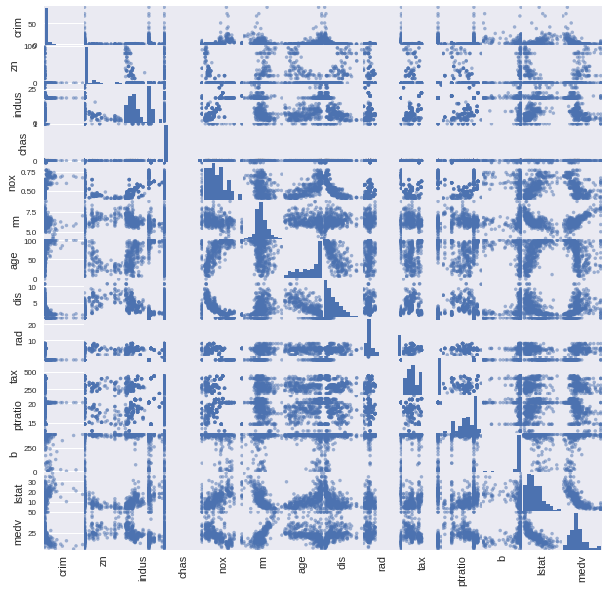

In [27]:
numeric_features = [t[0] for t in dataset.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dataset.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 1]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Check correlation

In [30]:
import six
for i in dataset.columns:
    if not( isinstance(dataset.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to medv for ", i, dataset.stat.corr('medv',i))

Correlation to medv for  crim -0.38830460858681154
Correlation to medv for  zn 0.3604453424505433
Correlation to medv for  indus -0.4837251600283728
Correlation to medv for  chas 0.1752601771902987
Correlation to medv for  nox -0.4273207723732821
Correlation to medv for  rm 0.6953599470715401
Correlation to medv for  age -0.3769545650045961
Correlation to medv for  dis 0.249928734085904
Correlation to medv for  rad -0.38162623063977735
Correlation to medv for  tax -0.46853593356776674
Correlation to medv for  ptratio -0.5077866855375622
Correlation to medv for  b 0.3334608196570661
Correlation to medv for  lstat -0.7376627261740145
Correlation to medv for  medv 1.0


**Convert all the features from different columns into a single column.**

Call the new vector column as ‘Attributes’ in the outputCol.

In [33]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'Attributes')
output = assembler.transform(dataset)
#Input vs Output
finalized_data = output.select("Attributes","medv")
finalized_data.show(5)

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
+--------------------+----+
only showing top 5 rows



 ‘Attributes’ are the input features from all the columns.
 
 ‘medv’ is the target column.

** Split the training and testing data **

In [0]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])


In [40]:
train_data.describe().show()

+-------+-----------------+
|summary|             medv|
+-------+-----------------+
|  count|              401|
|   mean|22.69775561097258|
| stddev|9.313174536651005|
|    min|              5.0|
|    max|             50.0|
+-------+-----------------+



**Model - Linear Regression**

In [37]:
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'medv',maxIter=10, regParam=0.3, elasticNetParam=0.8)

#Learn to fit the model from training set
regressor = regressor.fit(train_data)
print("Coefficients: " + str(regressor.coefficients))
print("Intercept: " + str(regressor.intercept))


Coefficients: [-0.04318248611504905,0.0030008268358269036,-0.06269558955685707,2.760218087692132,-4.378813392265133,4.118164962291768,0.0,-0.6164524240292871,-0.0,0.0,-0.7674172426278137,0.006421127602151606,-0.5337385189743884]
Intercept: 20.742250805910576


In [59]:
trainingSummary = regressor.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("MSE: %f" % trainingSummary.meanSquaredError)
print("MAE: %f" % trainingSummary.meanAbsoluteError)


RMSE: 5.042461
r2: 0.706117
MSE: 25.426412
MAE: 3.443899


RMSE measures the differences between predicted values by the model and the actual values.

R squared at 0.7 indicates that in our model, approximate 70% of the variability in “medv” can be explained using the model.



**Evaluation on test dataset**

In [60]:

eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)
# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)
# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)
# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)


RMSE: 4.352
r2: 0.750
MSE: 18.943
MAE: 3.215


In [61]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show(10)

numIterations: 11
objectiveHistory: [0.5, 0.4334626090251261, 0.24005365587355154, 0.2168683131771074, 0.1897454802256957, 0.1858122496597688, 0.18519805776005632, 0.1843883471709182, 0.18331532577127546, 0.18296167609100808, 0.18280503916725788]
+-------------------+
|          residuals|
+-------------------+
| -7.000052480112792|
| -5.532710883055252|
| 0.6934287178356655|
| 1.7871501774367893|
| 12.051009974526139|
|  0.676572601465697|
|-1.3537057564961614|
| -2.898301093176766|
|  8.643276043620574|
|  9.538924951838588|
+-------------------+
only showing top 10 rows



**Predictions**

In [55]:
predictor = regressor.transform(test_data)
predictor.select("prediction","medv","Attributes").show(5)


+------------------+----+--------------------+
|        prediction|medv|          Attributes|
+------------------+----+--------------------+
|  30.3623694855025|32.2|[0.00906,90.0,2.9...|
|29.900412475454953|35.4|[0.01311,90.0,1.2...|
| 38.65631817124957|50.0|[0.02009,95.0,2.6...|
| 36.11630316762934|42.3|[0.02177,82.5,2.0...|
| 27.10921583601499|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows



**Decision tree regression**

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='Attributes', labelCol = 'medv')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)


In [0]:
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")


In [75]:
dt_evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = dt_evaluator.evaluate(dt_predictions)
print("RMSE: %.3f" % rmse)
# r2 - coefficient of determination
r2 = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "r2"})
print("r2: %.3f" %r2)
# Mean Square Error
mse = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "mse"})
print("MSE: %.3f" % mse)
# Mean Absolute Error
mae = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)

RMSE: 3.692
r2: 0.820
MSE: 13.630
MAE: 2.669


**Feature importance**

In [76]:
dt_model.featureImportances

SparseVector(13, {0: 0.0481, 2: 0.0021, 4: 0.0464, 5: 0.5777, 7: 0.0951, 10: 0.0122, 11: 0.0055, 12: 0.213})

**Gradient-boosted tree regression**

In [80]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'Attributes', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'medv', 'Attributes').show(5)

+------------------+----+--------------------+
|        prediction|medv|          Attributes|
+------------------+----+--------------------+
|  33.9760659911078|32.2|[0.00906,90.0,2.9...|
| 32.77498689816357|35.4|[0.01311,90.0,1.2...|
|50.248087977781466|50.0|[0.02009,95.0,2.6...|
| 46.25006081433814|42.3|[0.02177,82.5,2.0...|
|24.326649640603904|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows



In [0]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")

In [88]:
dt_evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("RMSE: %g" % rmse)
# r2 - coefficient of determination
r2 = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "r2"})
print("r2: %.3f" %r2)
# Mean Square Error
mse = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "mse"})
print("MSE: %.3f" % mse)
# Mean Absolute Error
mae = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)

RMSE: 3.41246
r2: 0.847
MSE: 11.645
MAE: 2.475
